# Analysing and Plotting the output of our C++ (Extended) Kalman Filter

Doing the plotting in C++ would be hard and annoying

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle
import csv
import os

mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['figure.facecolor'] = 'black'
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['legend.facecolor'] = 'white'

In [2]:
filename = "./recorded_sensor_data/field_data_3/auto/kf_out.csv"
print(os.stat(filename).st_mtime)
data = np.genfromtxt(filename, delimiter=",", dtype=np.float64)

x = data[:,0]
y = data[:,1]
yaw = data[:,2]
dx = data[:,3]
dy = data[:,4]
dyaw = data[:,5]
ddx = data[:,6]
ddy = data[:,7]
ddyaw = data[:,8]

cov_x = data[:,9]
cov_y = data[:,10]
cov_yaw = data[:,11]
cov_dx = data[:,12]
cov_dy = data[:,13]
cov_dyaw = data[:,14]
cov_ddx = data[:,15]
cov_ddy = data[:,16]
cov_ddyaw = data[:,17]

measured_yaw = data[:,18]

1519444958.9245787


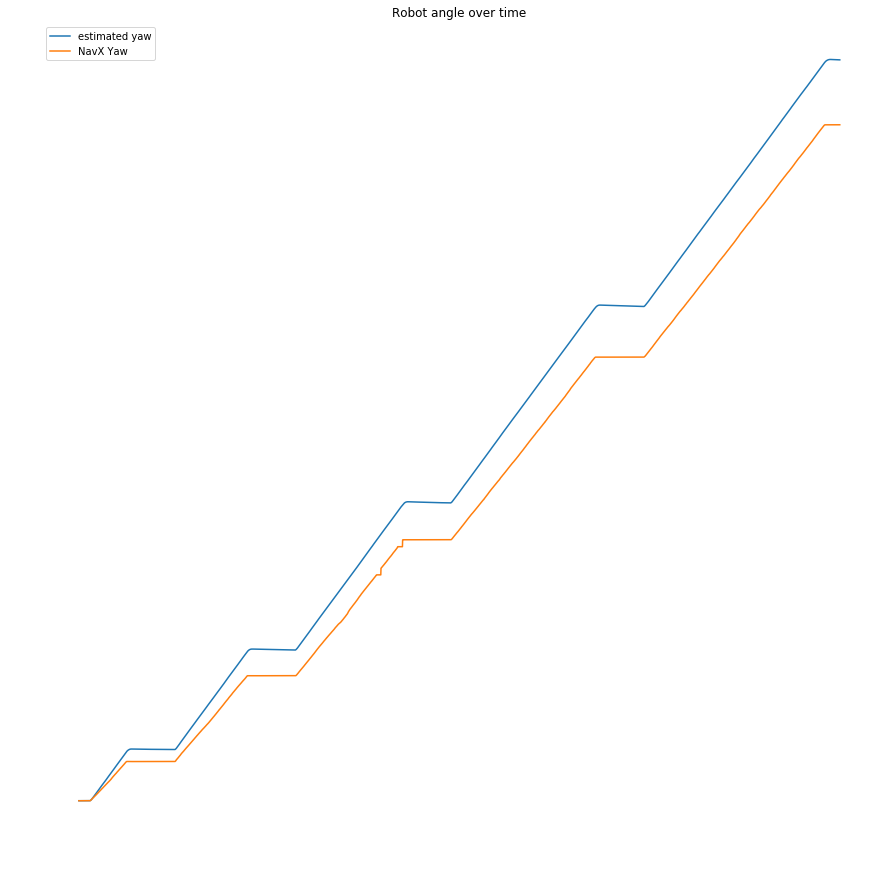

In [3]:
plt.figure(figsize=(15,15))
plt.plot(yaw[:], label='estimated yaw')
plt.plot(measured_yaw[:], label='NavX Yaw')
plt.title("Robot angle over time")
plt.ylabel("radians")
plt.xlabel("samples")
plt.legend()
plt.show()

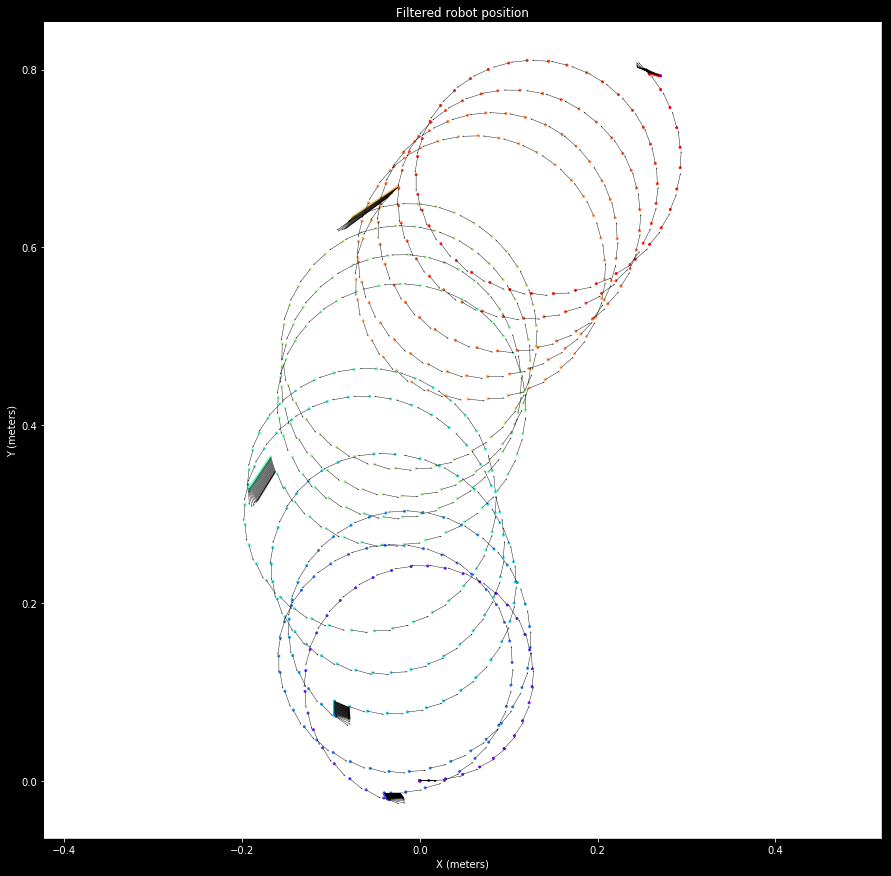

In [4]:
T_begin = 0
T_end = x.shape[0]
skip = 10

plt.figure(figsize=(15,15), facecolor='black')
colors = cm.rainbow(np.linspace(0, 1, T_end // skip))
plt.scatter(x[T_begin:T_end:skip],y[T_begin:T_end:skip], s=4, color=colors[T_begin:T_end])
plt.quiver(x[T_begin:T_end:skip],y[T_begin:T_end:skip], np.cos(yaw[T_begin:T_end:skip]), np.sin(yaw[T_begin:T_end:skip]), width=0.0005)
plt.ylabel("Y (meters)", color='white')
plt.xlabel("X (meters)", color='white')
plt.title("Filtered robot position", color='white')
plt.tick_params(colors='white')
plt.axis("equal")
plt.show()

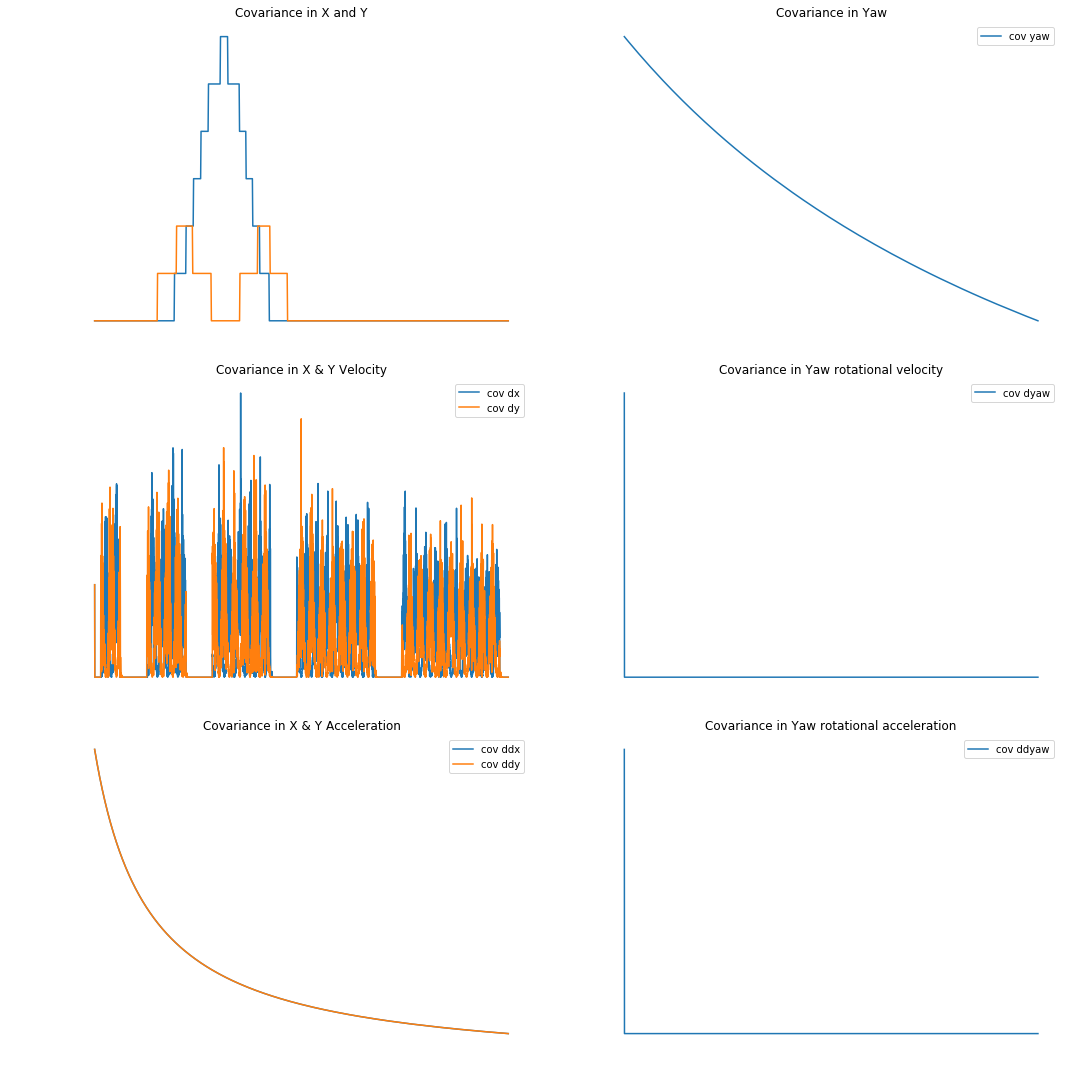

In [5]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax[0,0].plot(cov_x[:1000], label='cov x')
ax[0,0].plot(cov_y[:1000], label='cov y')
ax[0,0].set_title("Covariance in X and Y")

ax[1,0].plot(cov_dx, label='cov dx')
ax[1,0].plot(cov_dy, label='cov dy')
ax[1,0].set_title("Covariance in X & Y Velocity")
ax[1,0].legend()

ax[2,0].plot(cov_ddx, label='cov ddx')
ax[2,0].plot(cov_ddy, label='cov ddy')
ax[2,0].set_title("Covariance in X & Y Acceleration")
ax[2,0].legend()

ax[0,1].plot(cov_yaw, label='cov yaw')
ax[0,1].set_title("Covariance in Yaw")
ax[0,1].legend()

ax[1,1].plot(cov_dyaw, label='cov dyaw')
ax[1,1].set_title("Covariance in Yaw rotational velocity")
ax[1,1].legend()

ax[2,1].plot(cov_ddyaw, label='cov ddyaw')
ax[2,1].set_title("Covariance in Yaw rotational acceleration")
ax[2,1].legend()

plt.tight_layout()
plt.show()

Note that with the encoder-as-control-input EKF formulation, the covariance of $\dot{\theta}$ and $\ddot{\theta}$ go to zero immediately. This is expected because we the jacobian is zeros, and we're essentially not estimating those values. Instead, we calculate $\dot{\theta}$ directly from control inputs (encoder speeds) and we entirely ignore $\ddot{\theta}$